In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1 = pd.read_csv("metrics.csv")
df2 = pd.read_csv("../paper_based_unet_features_raw/metrics.csv")
df = pd.concat([df1, df2], ignore_index=True)

print(df.shape)
print(df.columns)
df.sample(2)

(25, 20)
Index(['run_name', 'test_file', 'arc_num_params', 'arc_features',
       'arc_encoder_blocks', 'arc_latent_volume', 'arc_skip', 'arc_num_conv',
       'train_loss', 'valid_loss', 'test_loss', 'valid_F1', 'train_F1',
       'test_F1', 'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,test_file,arc_num_params,arc_features,arc_encoder_blocks,arc_latent_volume,arc_skip,arc_num_conv,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
13,paper_based_unet_features-nc-1-n4-2-n8-1-skip0,test_0.csv,548,"[4, 4, 4, 8]",3,128.0,0,1,0.140461,0.131722,0.140854,0.764870,0.752950,0.741776,0.805570,0.818130,0.804081,0.0,0.0,0.0
20,paper_based_unet_features-nc-1-n4-0-n8-1-skip1,test_0.csv,308,"[4, 8]",1,512.0,0,1,0.062148,0.057204,0.061882,0.920327,0.913995,0.916943,0.915387,0.921696,0.917758,0.0,0.0,0.0


In [14]:
import plotly.express as px
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


hue = "arc_latent_volume"
xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"

extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_skip",
    "arc_num_conv",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


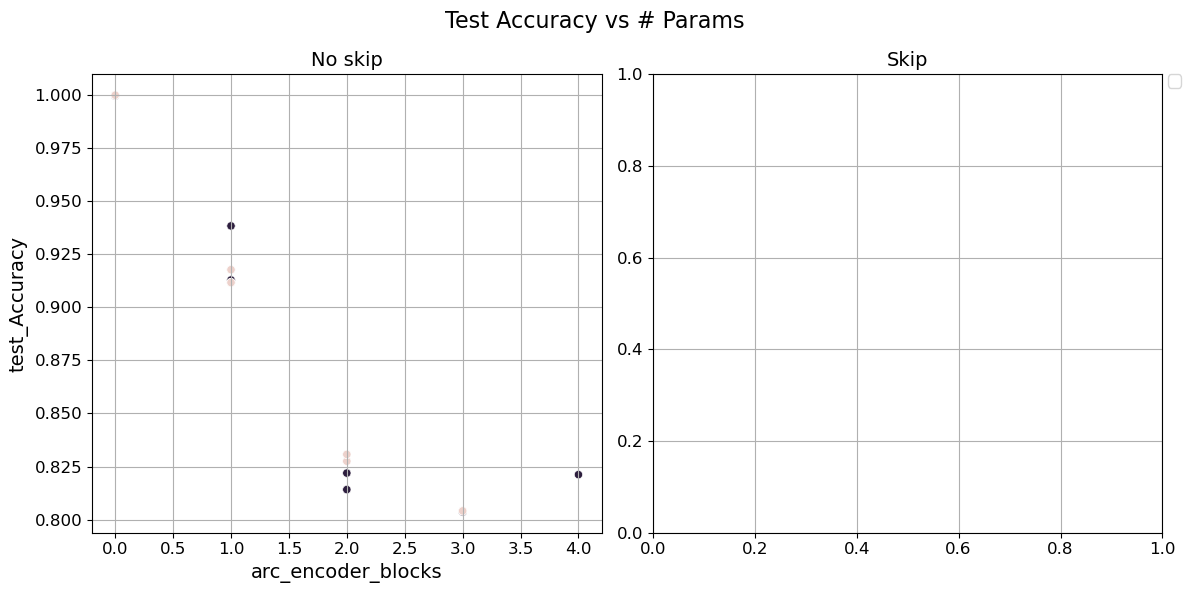

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = "arc_num_conv"
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.scatterplot(
    data=df0, x=xplot, y=yplot, hue=hue, style=style, ax=ax[0], size=size, legend=False
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, style=style, size=size, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

In [16]:
df.query("arc_latent_volume == 1024.0")

,run_name,test_file,arc_num_params,arc_features,arc_encoder_blocks,arc_latent_volume,arc_skip,arc_num_conv,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq


In [17]:
df.columns

Index(['run_name', 'test_file', 'arc_num_params', 'arc_features',
       'arc_encoder_blocks', 'arc_latent_volume', 'arc_skip', 'arc_num_conv',
       'train_loss', 'valid_loss', 'test_loss', 'valid_F1', 'train_F1',
       'test_F1', 'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


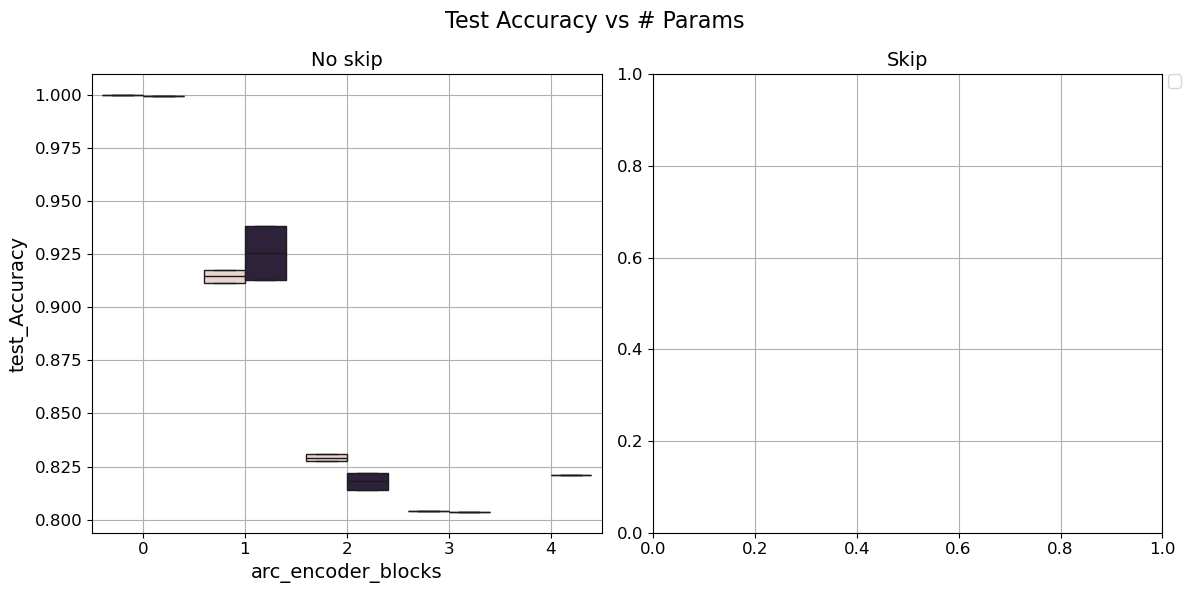

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"
# hue = "arc_latent_volume"
# size = "arc_num_conv"
size = None
hue = "arc_num_conv"
style = None
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(data=df0, x=xplot, y=yplot, hue=hue, ax=ax[0], legend=False)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_1732975/1253617345.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_1732975/1253617345.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


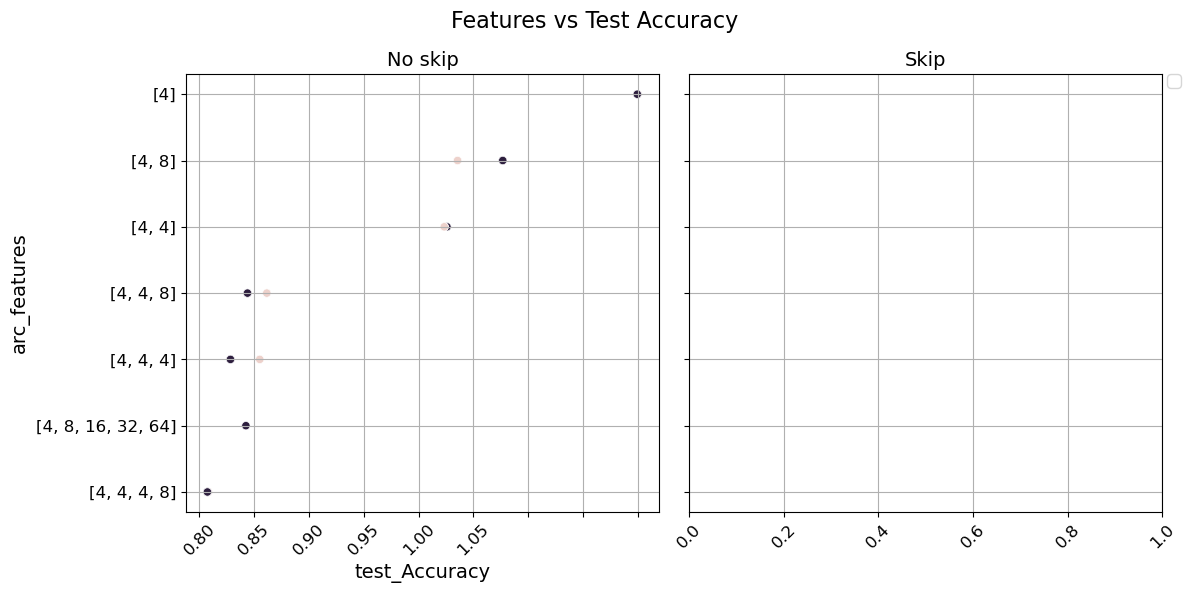

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

yplot = "arc_features"
xplot = "test_Accuracy"
hue = "arc_num_conv"
# size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.scatterplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=45)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_1732975/3115665747.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_1732975/3115665747.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


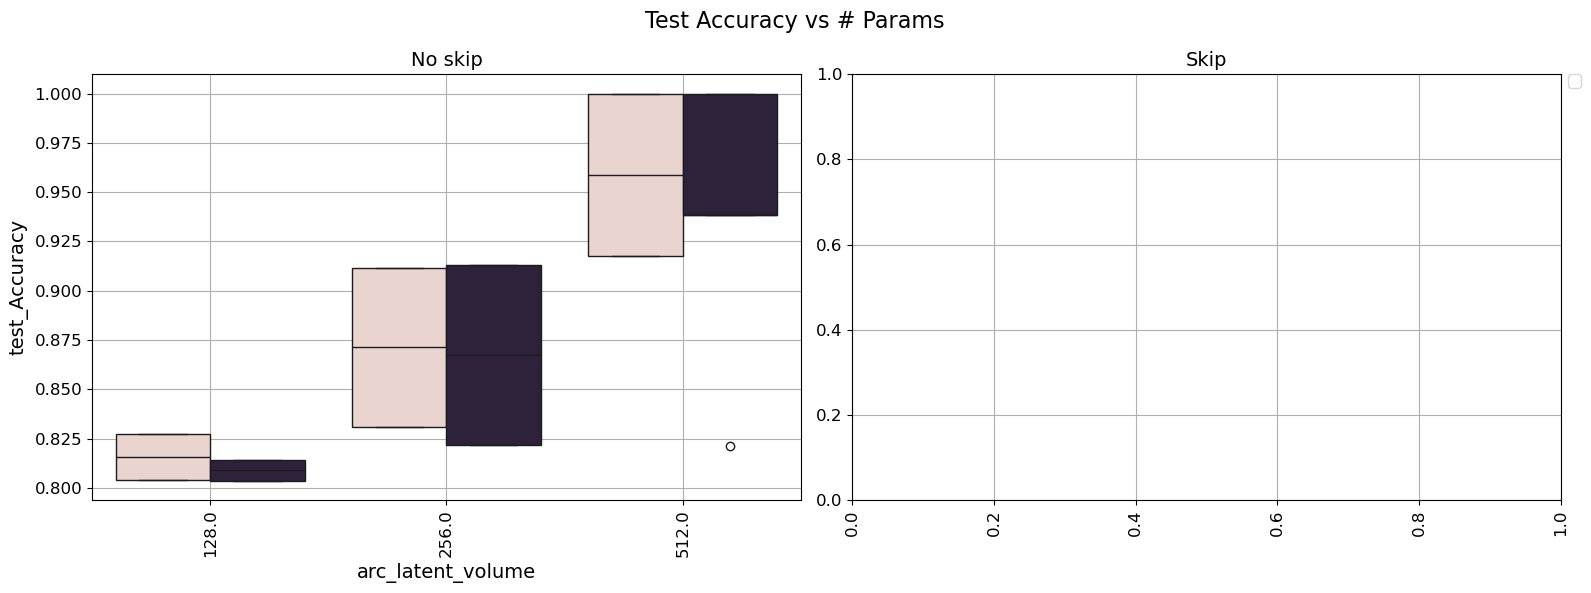

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

xplot = "arc_latent_volume"
yplot = "test_Accuracy"
hue = "arc_num_conv"
# size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

sns.boxplot(
    data=df0.sort_values(by="test_Accuracy"),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax[0],
    legend=False,
)
sns.boxplot(data=df1, x=xplot, y=yplot, hue=hue, ax=ax[1])

for a in ax:
    a.grid()
    a.set_xlabel(a.get_xlabel(), fontsize=14)
    a.set_ylabel(a.get_ylabel(), fontsize=14)
    a.tick_params(axis="both", which="major", labelsize=12)
    a.set_xticklabels(a.get_xticklabels(), rotation=90)

ax[1].legend(
    bbox_to_anchor=(1.01, 1),
    loc=2,
    borderaxespad=0.0,
    fontsize=12,
    title_fontsize=14,
)
fig.suptitle("Test Accuracy vs # Params", fontsize=16)
ax[0].set_title("No skip", fontsize=14)
ax[1].set_title("Skip", fontsize=14)

fig.tight_layout()
plt.show()

/tmp/ipykernel_1732975/1558454524.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



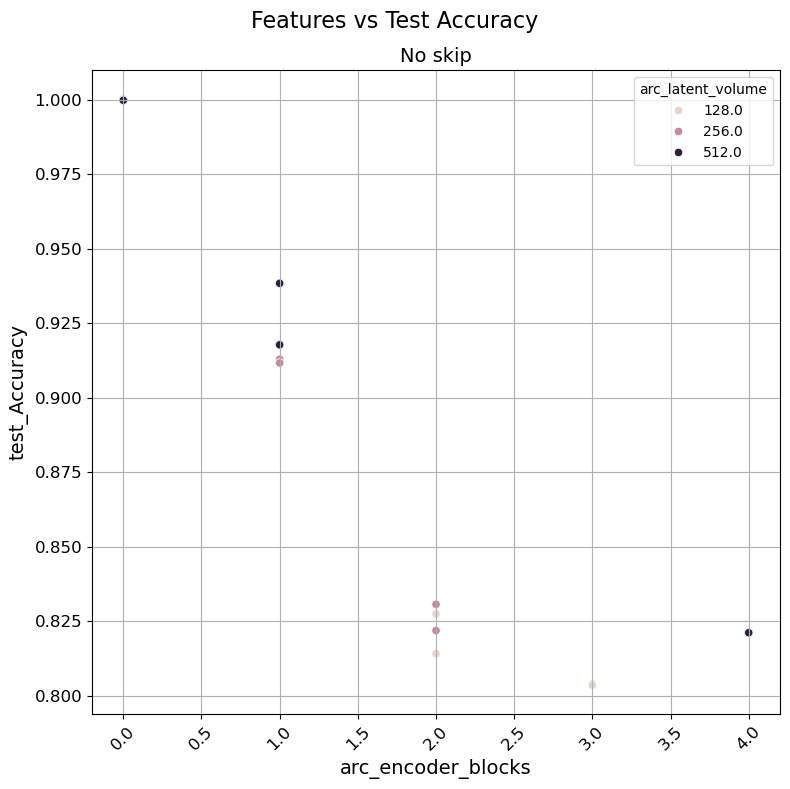

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 8), sharey=True)

xplot = "arc_encoder_blocks"
yplot = "test_Accuracy"
hue = "arc_latent_volume"
# size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    ax=ax,
)
ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax.set_title("No skip", fontsize=14)
fig.tight_layout()
plt.show()

/tmp/ipykernel_1732975/2266281179.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



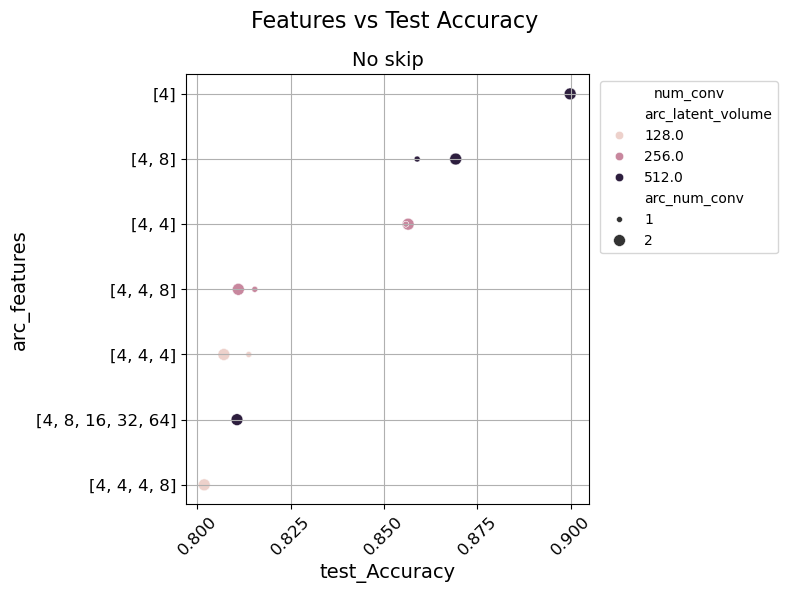

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)

xplot = "test_Accuracy"
yplot = "arc_features"
hue = "arc_latent_volume"
size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    size=size,
    ax=ax,
)
ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(
    title="num_conv",
    bbox_to_anchor=(1.01, 1),
)
fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax.set_title("No skip", fontsize=14)
fig.tight_layout()
plt.show()

/tmp/ipykernel_1732975/3332666044.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



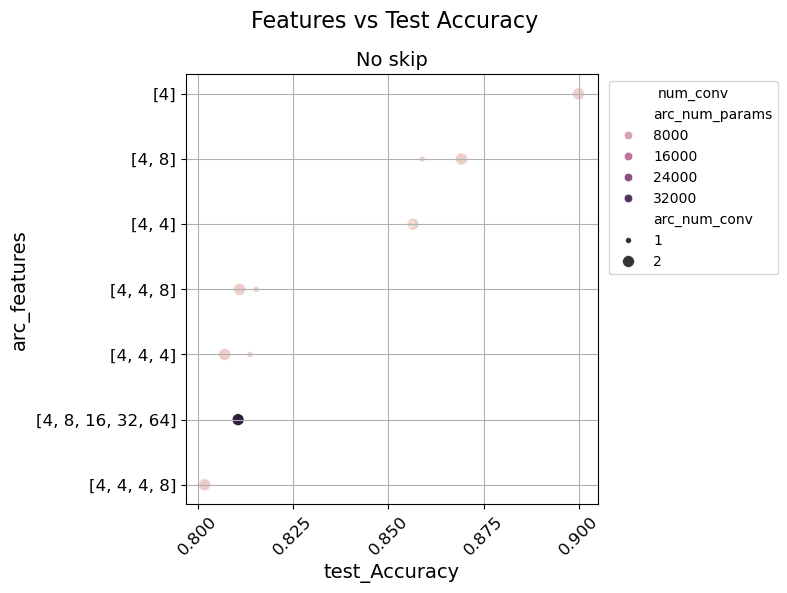

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(8, 6), sharey=True)

xplot = "test_Accuracy"
yplot = "arc_features"
hue = "arc_num_params"
size = "arc_num_conv"
extra_info = [
    "test_file",
    "arc_num_params",
    "arc_features",
    "arc_encoder_blocks",
    "arc_latent_volume",
    "arc_num_conv",
    "arc_skip",
]

df0 = df.query("arc_skip == 0")

sns.scatterplot(
    data=df0.sort_values(by="test_Accuracy", ascending=False),
    x=xplot,
    y=yplot,
    hue=hue,
    size=size,
    ax=ax,
)
ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(
    title="num_conv",
    bbox_to_anchor=(1.01, 1),
)
fig.suptitle("Features vs Test Accuracy", fontsize=16)
ax.set_title("No skip", fontsize=14)
fig.tight_layout()
plt.show()